# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 4 - Introduction to Deep Learning </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1UbsAuO7Eiyw7aVfeEHLswryK-PjFZITc?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import Basic Modules
import tensorflow as tf # to create neural networks
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for plots 
plt.style.use('dark_background') # to adapt the colors to a dark background

The objective of this session is to use a neural network for a sentiment analysis task on the Imdb dataset.

In this example, we will learn to classify movie reviews as positive or negative, based on the text content of the reviews.



<center><img width="300" src = "https://drive.google.com/uc?export=view&id=1qhP9rw1v2zx3NouaFhEiFAnYHpkqPGST"></center>

# 1. Exploring the dataset

## 1.1 Preprocessing the data

* As preprocessing text data is not the objective of today's programming session (See Lecture 6), we will use preprocessed reviews. 

* Each review is a sequence of words. The preprocessing of these sequences is done using a dictionary called **word2idx** which maps each word to an integer.  

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1Gp8xNTpTxR9TMaS6frkLmHt9YxYeN2RD"></center>

* In our example, words are indexed by overall frequency in the dataset, so that for instance the integer "4" encodes the 4th most frequent word in the data.

* We end up with preprocessed reviews, which are **list of integers**, as shown in the following figure

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1GM14DjLNMzgzOBIxas6d2rJvK83iYdQJ"></center>

Let `V = 10000` be the vocabulary size (i.e, the number of words you want to process). The other words are all going to be considered as "unknown" (also called "out of vocabulary") with the same index. 

In [ ]:
V = 10000


---
<font color=green>Q1:</font>
<br><font color='green'>
Load the dataset named `imdb` from `tensorflow.keras.datasets`. (More information [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data)). 
</font>

---

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(path='imdb.npz', 
                                                      num_words=V, # Number of words kept in the dataset (vocabulary size) 
                                                      maxlen=1000, # Maximim sequence length (the rest is truncated)
                                                      start_char=1, # index of start of sequence (<sos>)
                                                      oov_char=2, # index for unknow word (oov : out of vocabulary)
                                                      index_from=3) # first index of actual words (as 0 is for padding, 1 for <sos> and 2 for oov)

---
<font color=green>Q2:</font>
<br><font color='green'>
Show the first training data as a list of integers (or 1D array)
</font>

---

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

---
<font color=green>Q3:</font>
<br><font color='green'>
Get the `word2idx` dictionary using `imdb.get_word_index()`. What is the index of the word "great" ? 
</font>

---

84

---
<font color=green>Q4:</font>
<br><font color='green'>
Create a dictionary called `idx2word` to reverse the dictionary `word2idx`. Deduce the original review corresponding to the first training data (as a sequence of words and not a sequence of integers). Note that the indexes are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
</font>

---

"oov this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert oov is an amazing actor and now the same being director oov father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for oov and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also oov to the two little boy's that played the oov of norman and paul they were just brilliant children are often left out of the oov list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

## 1.2 Creating the (N, V) tensor of Data 

The data is a list of lists.


---
<font color=green>Q5:</font>
<br><font color='green'>
What is the maximum length of the training sequences ? 
</font>

---

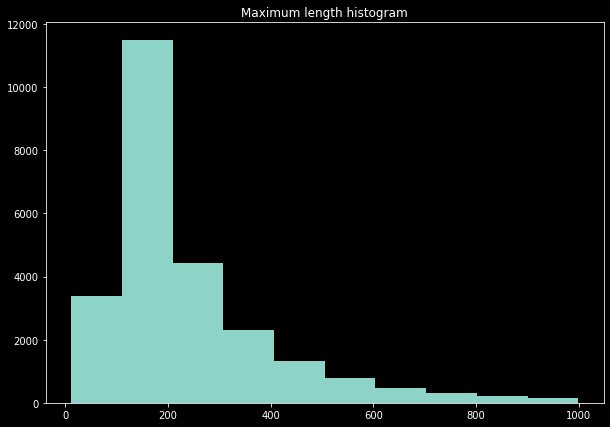

999

---
<font color=green>Q6:</font>
<br><font color='green'>
Create a function named `vectorize` that takes as input:

* sequences: a list of list of integers. 
* V : The vocabulary size.  
</font>

<br><font color='green'>
The function will output a tensor of shape (N, V), N being the length of the sequences, such that: 
* Each sequence is represented by a row in the (N, V) tensor. 
* For each sequence, the corresponding row is a V-dimensional vector where all the components are 0 except for the indices appearing in the sequence. For instance the sequence [12, 564] will be represented by a V-dim vector with zeros everywhere except for indices 12 and 564. 
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1jw29117eRETMUSNquct9bdhhwfPOdBj5"></center>

---
<font color=green>Q7:</font>
<br><font color='green'>
Vectorize the training data and the test data.
</font>

---

In [ ]:
# Train tensor

# Test tensor


(24875, 10000)

(24944, 10000)

---
<font color=green>Q8:</font>
<br><font color='green'>
Turn the labels into float numbers
</font>

---

(24875,)

(24944,)

# 2. Sentiment Analysis

## 2.2 Building the Model

Our task is a binary classification task.

---
<font color=green>Q9:</font>
<br><font color='green'>
What is the most suitable loss function ? What should be the last activation function ?
</font>

---


The loss function is the binary classification loss function. The last layer should have a **sigmoid** activation function. 


<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1PJPvjjoPG6NASHekAFCxgu8OXwEfO7bN"></center>

---
<font color=green>Q10:</font>
<br><font color='green'>
Using `Sequential` from tensorflow.keras as explained in this [link](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), Create the following model. 
</font>

---


<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1Hl_A1tK9ewEZD-3Jwz7HdchSF1q-LUqY"></center>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               2560256   
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,597,553
Trainable params: 2,597,553
Non-trainable params: 0
_________________________________________________________________


---
<font color=green>Q11:</font>
<br><font color='green'>
Fit the model to the training data using **Stochastic Gradient Descent**
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1FQQv9phTnhFjMP54UvBLn6pps-l0L0AM"></center>

Epoch 1/20
273/273 [==============================] - 8s 26ms/step - loss: 0.6854 - acc: 0.5935 - val_loss: 0.6699 - val_acc: 0.7012
Epoch 2/20
273/273 [==============================] - 7s 25ms/step - loss: 0.6213 - acc: 0.7491 - val_loss: 0.5396 - val_acc: 0.7998
Epoch 3/20
273/273 [==============================] - 7s 24ms/step - loss: 0.4404 - acc: 0.8263 - val_loss: 0.5387 - val_acc: 0.7358
Epoch 4/20
273/273 [==============================] - 7s 25ms/step - loss: 0.3315 - acc: 0.8622 - val_loss: 0.3265 - val_acc: 0.8619
Epoch 5/20
273/273 [==============================] - 7s 25ms/step - loss: 0.2816 - acc: 0.8874 - val_loss: 0.2981 - val_acc: 0.8774
Epoch 6/20
273/273 [==============================] - 7s 25ms/step - loss: 0.2474 - acc: 0.8997 - val_loss: 0.2919 - val_acc: 0.8821
Epoch 7/20
273/273 [==============================] - 7s 25ms/step - loss: 0.2247 - acc: 0.9109 - val_loss: 0.3394 - val_acc: 0.8651
Epoch 8/20
273/273 [==============================] - 7s 25ms/step - 

---
<font color=green>Q12:</font>
<br><font color='green'>
Plot the losses and accuracies for the training and the validation data. 
</font>

---

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

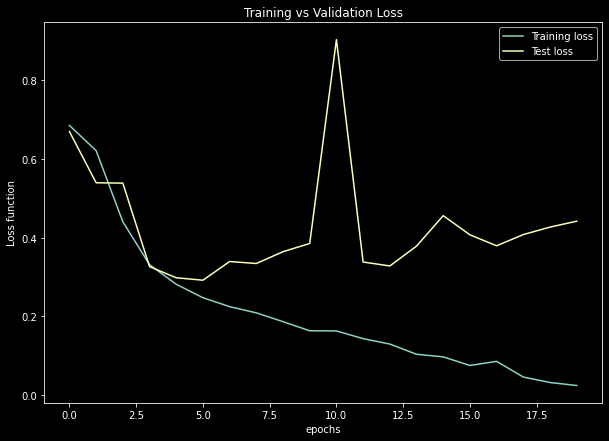

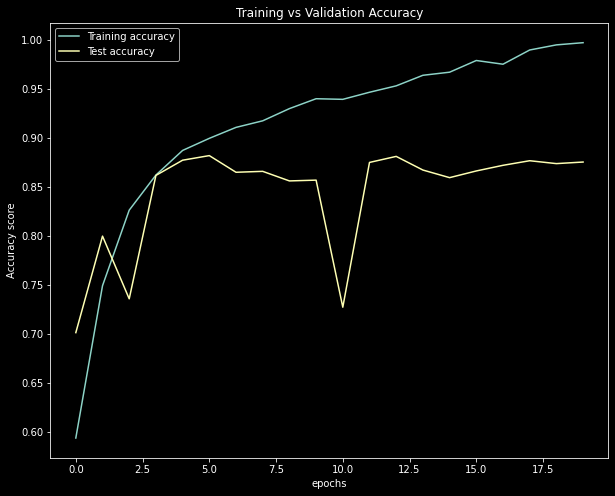

---
<font color=green>Q13:</font>
<br><font color='green'>
What problem can we conlude from the previous plots?</font>

---
 

The validation loss starts increasing after 5 epochs, we have an **overfitting** problem. 

## 2.2 Fighting the Overfitting problem

To reduce the overfitting. Let's start by decreasing the complexity of the model. 

---
<font color=green>Q14:</font>
<br><font color='green'>
Create the following model and train it. (Set the Dropout rate to 0.2). 

---



<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1xlMRa7JsCFfMejfqA65b_aiGLE1dQNfY"></center>

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               2560256   
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 8)                

Epoch 1/10
273/273 [==============================] - 8s 27ms/step - loss: 0.6903 - acc: 0.5287 - val_loss: 0.6779 - val_acc: 0.6570
Epoch 2/10
273/273 [==============================] - 7s 25ms/step - loss: 0.6521 - acc: 0.6572 - val_loss: 0.5832 - val_acc: 0.7793
Epoch 3/10
273/273 [==============================] - 7s 25ms/step - loss: 0.5345 - acc: 0.7607 - val_loss: 0.4338 - val_acc: 0.8160
Epoch 4/10
273/273 [==============================] - 7s 26ms/step - loss: 0.4215 - acc: 0.8179 - val_loss: 0.3556 - val_acc: 0.8538
Epoch 5/10
273/273 [==============================] - 7s 26ms/step - loss: 0.3624 - acc: 0.8499 - val_loss: 0.3655 - val_acc: 0.8444
Epoch 6/10
273/273 [==============================] - 7s 25ms/step - loss: 0.3238 - acc: 0.8716 - val_loss: 0.3270 - val_acc: 0.8655
Epoch 7/10
273/273 [==============================] - 7s 26ms/step - loss: 0.2894 - acc: 0.8870 - val_loss: 0.2937 - val_acc: 0.8785
Epoch 8/10
273/273 [==============================] - 7s 25ms/step - 

---
<font color=green>Q15:</font>
<br><font color='green'>
Plot the losses and accuracies for the training and the validation data. 
</font>

---

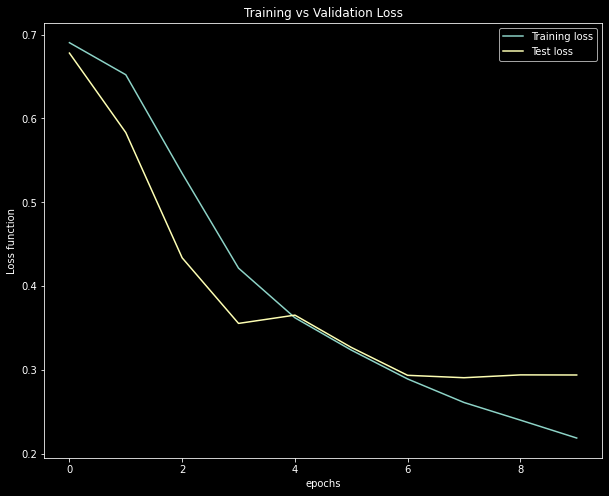

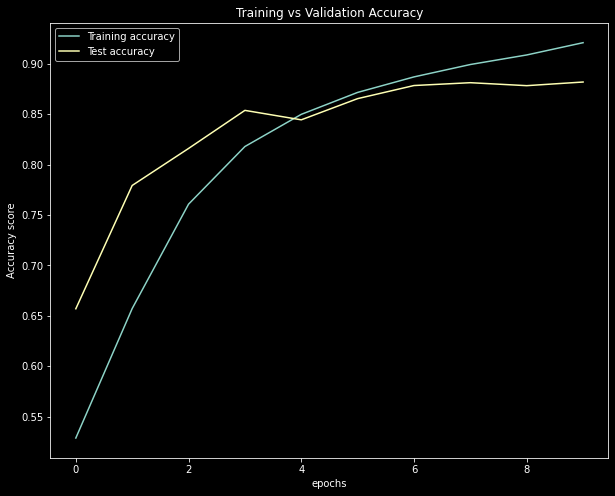

---
<font color=green>Q16:</font>
<br><font color='green'>
Evaluate your final model on the test data
</font>

---

780/780 [==============================] - 6s 7ms/step - loss: 0.3105 - acc: 0.8734


[0.31047117710113525, 0.8733963966369629]

# Wrap-up




In this lecture we learned:

* How to preprocess sequences of word reviews. 
* How to create a stack of fully connected layers for a binary classification task. 
* How to train the model using Stochastic Gradient Descent
* How to find the optimal complexity of a neural network in order to keep the balance between **Optimization** and **Generalization**


How to improve the model ? 
* By playing with the hyperparameters and the regularization techniques. 
* By finding a better way of encoding the words (See Lecture 5)
* By using Sequential Models which take into consideration the sequential nature of the data (See Lectures 6, 7 and 8)

# Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk

